In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline



In [3]:
emp = pd.read_csv('emp_data.csv')

In [4]:
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


In [5]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Salary_hike       10 non-null int64
Churn_out_rate    10 non-null int64
dtypes: int64(2)
memory usage: 288.0 bytes


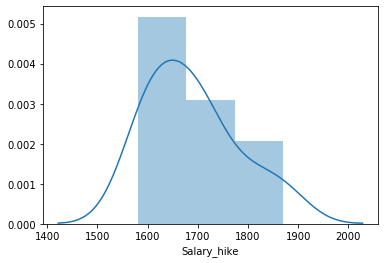

In [6]:
sns.distplot(emp['Salary_hike'])

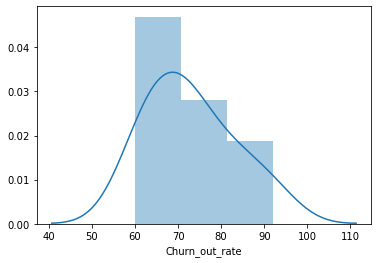

In [7]:
sns.distplot(emp['Churn_out_rate'])

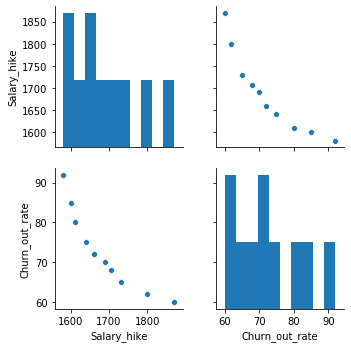

In [8]:
sns.pairplot(emp) #1.Little or no Multicollinearity between the features:

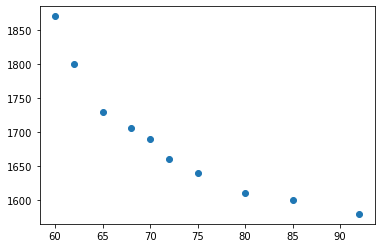

In [9]:
plt.scatter(emp['Churn_out_rate'],emp['Salary_hike']) 
#2. Linear Relationship between the features and target:

In [10]:
emp.corr()

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


In [11]:
X= emp['Salary_hike'].values.reshape(-1,1)
print(X)

[[1580]
 [1600]
 [1610]
 [1640]
 [1660]
 [1690]
 [1706]
 [1730]
 [1800]
 [1870]]


In [12]:
Y= emp['Churn_out_rate'].values.reshape(-1,1)

print(Y)

[[92]
 [85]
 [80]
 [75]
 [72]
 [70]
 [68]
 [65]
 [62]
 [60]]


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(X_train,Y_train)

In [16]:
print(lm.intercept_)

[ 178.19307155]


In [17]:
print(lm.coef_)

[[-0.06387791]]


In [18]:
model.score(X_train,Y_train)  #R^2 value 

0.95810561249124171

In [19]:
predictions = model.predict(X_test)

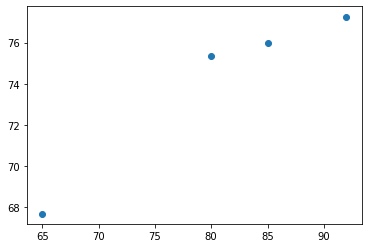

In [20]:
plt.scatter(Y_test,predictions)

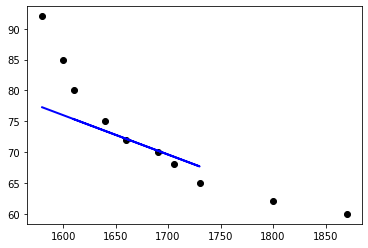

In [21]:


plt.scatter(
    emp['Salary_hike'],
    emp['Churn_out_rate'],
    c='black'
)
plt.plot(
    X_test,
    predictions,
    c='blue',
    linewidth=2
)

In [22]:
from sklearn import metrics

In [23]:
print('MAE',metrics.mean_absolute_error(Y_test,predictions))

MAE 7.77006642563


In [24]:
print('MSE',metrics.mean_squared_error(Y_test,predictions))

MSE 81.7828935969


In [25]:
print('RMSE',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

RMSE 9.04338949713


In [26]:
import pylab

[[ 0.21930762]
 [-0.80122479]
 [ 0.99780727]
 [ 0.08851882]
 [ 0.94548443]
 [-0.17592725]
 [-0.11493454]
 [ 0.85082434]
 [ 0.13220235]
 [-0.68337176]]


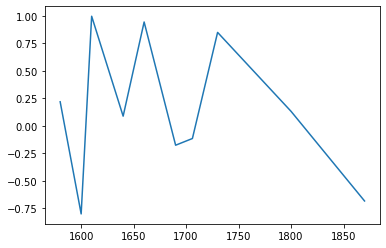

In [27]:
Y1 = np.sin(X)
pylab.plot(X,Y1)
print(Y1)


[[ 7.36518013]
 [ 7.37775891]
 [ 7.38398946]
 [ 7.40245152]
 [ 7.41457288]
 [ 7.43248381]
 [ 7.44190673]
 [ 7.45587669]
 [ 7.49554194]
 [ 7.53369371]]


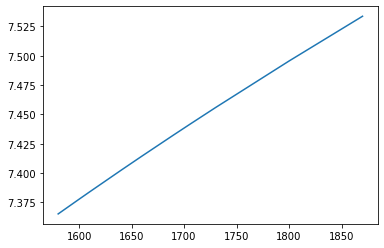

In [28]:
Y3 = np.log(X)
pylab.plot(X,Y3)
print(Y3)

TypeError: score() missing 1 required positional argument: 'y'

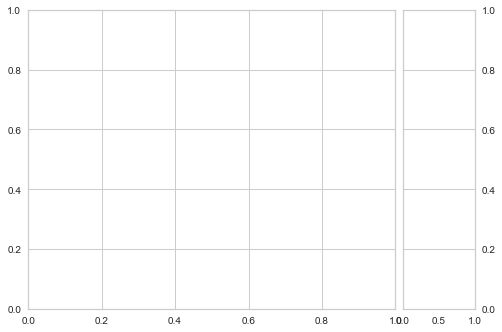

In [29]:
import yellowbrick as yb
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import LinearRegression
lm=LinearRegression
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train,Y_train) #Fit the training data to the model
visualizer.score(X_test,Y_test) # Evaluate the model on the test data
visualizer.poof() # Draw/show/proof the data

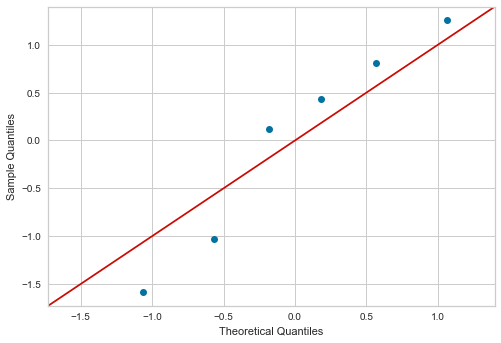

In [30]:
import statsmodels.api as sm
#4.Normal distribution of error terms:
model = sm.OLS(Y_train,X_train).fit()
res = model.resid #residuals
fig = sm.qqplot(res,fit=True,line='45')
plt.show()  #Q-Qplot for the advertising data set

In [31]:
mod= sm.OLS(Y_train,X_train) #5.Little or No autocorrelation in the residuals:
results = mod.fit()
print(results.summary())  #Summary of the fitted Linear Model

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              319.6
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                    1.01e-05
Time:                        16:59:22   Log-Likelihood:                         -21.315
No. Observations:                   6   AIC:                                      44.63
Df Residuals:                       5   BIC:                                      44.42
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
